### Import libraries/ Dipendancies -

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

import json
import pickle

### Reading CSV

In [4]:
df = pd.read_csv("Tel_churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Tenure1,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,2,0,1,0,0,0,0,0,1,29.85,29.85,0,1,1,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,3,1,0,0,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,0,0,0,1,53.85,108.15,1,1,1,0,0,0,0,0,1
3,1,0,0,0,0,2,1,0,1,1,0,0,1,0,42.30,1840.75,0,4,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1,0,0,0,1,0


In [5]:
x = df.drop('Churn',axis=1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Tenure1,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,2,0,1,0,0,0,0,0,1,29.85,29.85,1,1,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,3,1,0,0,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,0,0,0,1,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,0,2,1,0,1,1,0,0,1,0,42.30,1840.75,4,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,0,0,1,0


In [7]:
y = df["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Train Test Split

In [35]:
# Splitting of dataset for the training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [36]:
# Checking for the proper splitting happened or not.
print(f"X Train Shape - {x_train.shape}")
print(f"X Test Shape - {x_test.shape}")
print(f"Y Train Shape - {y_train.shape}")
print(f"Y Test Shape - {y_test.shape}")

X Train Shape - (4922, 24)
X Test Shape - (2110, 24)
Y Train Shape - (4922,)
Y Test Shape - (2110,)


### Model Fitting -

In [37]:
# Model Training for logistic regression -
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [38]:
# Model Training for KNN Classifier -
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
# Model Training for Descision Tree Classifier -
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

### Model Evaluation

In [40]:
# Evaluation of Logistic regression Model based on Training data -
y_pred = lr_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(y_train,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(y_train,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(y_train,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(y_train,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(y_train,y_pred)
print(f"Classification report - \n{cnf_report}")

Confusion matrix - 
[[3225  389]
 [ 596  712]]

Precision - 0.6466848319709355

Recall - 0.5443425076452599

Accuracy - 0.7998780983340106

F1 Score - 0.5911166459111664

Classification report - 
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3614
           1       0.65      0.54      0.59      1308

    accuracy                           0.80      4922
   macro avg       0.75      0.72      0.73      4922
weighted avg       0.79      0.80      0.79      4922



In [41]:
# Evaluation of Logistic regression Model based on Testing data -
y_pred = lr_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(y_test,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(y_test,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(y_test,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(y_test,y_pred)
print(f"Classification report - \n{cnf_report}")
res = pd.DataFrame([["Logistic Regression",preci,recal,accuracy,f1]],
                   columns=["Model","Precision","Recall","Accuracy","f1 Score"])

Confusion matrix - 
[[1383  166]
 [ 266  295]]

Precision - 0.6399132321041214

Recall - 0.5258467023172906

Accuracy - 0.795260663507109

F1 Score - 0.5772994129158512

Classification report - 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [42]:
# Evaluation of KNN classifier Model based on Training data -
y_pred = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(y_train,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(y_train,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(y_train,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(y_train,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(y_train,y_pred)
print(f"Classification report - \n{cnf_report}")

Confusion matrix - 
[[3323  291]
 [ 543  765]]

Precision - 0.7244318181818182

Recall - 0.5848623853211009

Accuracy - 0.8305566842746851

F1 Score - 0.6472081218274112

Classification report - 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3614
           1       0.72      0.58      0.65      1308

    accuracy                           0.83      4922
   macro avg       0.79      0.75      0.77      4922
weighted avg       0.82      0.83      0.82      4922



In [43]:
# Evaluation of KNN classifer Model based on Testing data -
y_pred = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci1 = precision_score(y_test,y_pred)
print(f"Precision - {preci1}\n")
recal1 = recall_score(y_test,y_pred)
print(f"Recall - {recal1}\n")
accuracy1 = accuracy_score(y_test,y_pred)
print(f"Accuracy - {accuracy1}\n")
f11 = f1_score(y_test,y_pred)
print(f"F1 Score - {f11}\n")

cnf_report = classification_report(y_test,y_pred)
print(f"Classification report - \n{cnf_report}")
res1 = pd.DataFrame([["KNN Classifier",preci1,recal1,accuracy1,f11]],
                   columns=["Model","Precision","Recall","Accuracy","f1 Score"])

Confusion matrix - 
[[1379  170]
 [ 312  249]]

Precision - 0.594272076372315

Recall - 0.44385026737967914

Accuracy - 0.771563981042654

F1 Score - 0.5081632653061224

Classification report - 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.59      0.44      0.51       561

    accuracy                           0.77      2110
   macro avg       0.70      0.67      0.68      2110
weighted avg       0.76      0.77      0.76      2110



In [44]:
# Evaluation of Descision Tree classifier Model based on Training data -
y_pred = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(y_train,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(y_train,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(y_train,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(y_train,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(y_train,y_pred)
print(f"Classification report - \n{cnf_report}")

Confusion matrix - 
[[3613    1]
 [   6 1302]]

Precision - 0.9992325402916347

Recall - 0.9954128440366973

Accuracy - 0.9985778138967899

F1 Score - 0.9973190348525469

Classification report - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922



In [45]:
# Evaluation of Descision Tree classifer Model based on Testing data -
y_pred = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci2 = precision_score(y_test,y_pred)
print(f"Precision - {preci2}\n")
recal2 = recall_score(y_test,y_pred)
print(f"Recall - {recal2}\n")
accuracy2 = accuracy_score(y_test,y_pred)
print(f"Accuracy - {accuracy2}\n")
f12 = f1_score(y_test,y_pred)
print(f"F1 Score - {f12}\n")

cnf_report = classification_report(y_test,y_pred)
print(f"Classification report - \n{cnf_report}")
res2 = pd.DataFrame([["Descision Tree Classifier",preci2,recal2,accuracy2,f12]],
                   columns=["Model","Precision","Recall","Accuracy","f1 Score"])

Confusion matrix - 
[[1234  315]
 [ 260  301]]

Precision - 0.48863636363636365

Recall - 0.5365418894830659

Accuracy - 0.7274881516587678

F1 Score - 0.5114698385726423

Classification report - 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1549
           1       0.49      0.54      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.73      2110



In [46]:
# Creating new dataframe by joining 3 dataframes of evaluation values of different models
result = pd.concat([res,res1,res2],ignore_index=True)
result

,Model,Precision,Recall,Accuracy,f1 Score
0,Logistic Regression,0.639913,0.525847,0.795261,0.577299
1,KNN Classifier,0.594272,0.443850,0.771564,0.508163
2,Descision Tree Classifier,0.488636,0.536542,0.727488,0.511470


- As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
- Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
- Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

### Resampling SMOTEENN

In [47]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [48]:
# Splitting of dataset for the training and testing
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [49]:
# Checking for the proper splitting happened or not.
print(f"X Train Shape - {xr_train.shape}")
print(f"X Test Shape - {xr_test.shape}")
print(f"Y Train Shape - {yr_train.shape}")
print(f"Y Test Shape - {yr_test.shape}")

X Train Shape - (4615, 24)
X Test Shape - (1154, 24)
Y Train Shape - (4615,)
Y Test Shape - (1154,)


### Model Training After SMOTE

In [50]:
# Model Training for logistic regression after sampling -
lr_model_sm = LogisticRegression()
lr_model_sm.fit(xr_train,yr_train)

LogisticRegression()

In [51]:
# Model Training for KNN Classifier after sampling-
knn_model_sm = KNeighborsClassifier()
knn_model_sm.fit(xr_train,yr_train)

KNeighborsClassifier()

In [52]:
# Model Training for Descision Tree Classifier after sampling -
dt_model_sm = DecisionTreeClassifier()
dt_model_sm.fit(xr_train,yr_train)

DecisionTreeClassifier()

### Model Evaluation After SMOTE

In [60]:
# Evaluation of Logistic regression Model based on Training data after sampling-
y_pred = lr_model_sm.predict(xr_train)

cnf_matrix = confusion_matrix(yr_train,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(yr_train,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(yr_train,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(yr_train,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(yr_train,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(yr_train,y_pred)
print(f"Classification report - \n{cnf_report}")

Confusion matrix - 
[[1948  167]
 [ 151 2349]]

Precision - 0.9336248012718601

Recall - 0.9396

Accuracy - 0.9310942578548213

F1 Score - 0.9366028708133971

Classification report - 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2115
           1       0.93      0.94      0.94      2500

    accuracy                           0.93      4615
   macro avg       0.93      0.93      0.93      4615
weighted avg       0.93      0.93      0.93      4615



In [61]:
# Evaluation of Logistic regression Model based on Testing data after sampling-
y_pred = lr_model_sm.predict(xr_test)

cnf_matrix = confusion_matrix(yr_test,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(yr_test,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(yr_test,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(yr_test,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(yr_test,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(yr_test,y_pred)
print(f"Classification report - \n{cnf_report}")
res11 = pd.DataFrame([["Logistic Regression",preci,recal,accuracy,f1]],
                   columns=["Model","Precision","Recall","Accuracy","f1 Score"])

Confusion matrix - 
[[472  55]
 [ 39 588]]

Precision - 0.9144634525660964

Recall - 0.937799043062201

Accuracy - 0.9185441941074524

F1 Score - 0.925984251968504

Classification report - 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       527
           1       0.91      0.94      0.93       627

    accuracy                           0.92      1154
   macro avg       0.92      0.92      0.92      1154
weighted avg       0.92      0.92      0.92      1154



In [62]:
# Evaluation of KNN classifier Model based on Training data after sampling-
y_pred = knn_model_sm.predict(xr_train)

cnf_matrix = confusion_matrix(yr_train,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(yr_train,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(yr_train,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(yr_train,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(yr_train,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(yr_train,y_pred)
print(f"Classification report - \n{cnf_report}")

Confusion matrix - 
[[2024   91]
 [  31 2469]]

Precision - 0.964453125

Recall - 0.9876

Accuracy - 0.9735644637053088

F1 Score - 0.9758893280632412

Classification report - 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2115
           1       0.96      0.99      0.98      2500

    accuracy                           0.97      4615
   macro avg       0.97      0.97      0.97      4615
weighted avg       0.97      0.97      0.97      4615



In [64]:
# Evaluation of KNN classifer Model based on Testing data after sampling-
y_pred = knn_model_sm.predict(xr_test)

cnf_matrix = confusion_matrix(yr_test,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci1 = precision_score(yr_test,y_pred)
print(f"Precision - {preci1}\n")
recal1 = recall_score(yr_test,y_pred)
print(f"Recall - {recal1}\n")
accuracy1 = accuracy_score(yr_test,y_pred)
print(f"Accuracy - {accuracy1}\n")
f11 = f1_score(yr_test,y_pred)
print(f"F1 Score - {f11}\n")

cnf_report = classification_report(yr_test,y_pred)
print(f"Classification report - \n{cnf_report}")
res22 = pd.DataFrame([["KNN Classifier",preci1,recal1,accuracy1,f11]],
                   columns=["Model","Precision","Recall","Accuracy","f1 Score"])

Confusion matrix - 
[[485  42]
 [ 13 614]]

Precision - 0.9359756097560976

Recall - 0.9792663476874003

Accuracy - 0.9523396880415944

F1 Score - 0.9571317225253314

Classification report - 
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       527
           1       0.94      0.98      0.96       627

    accuracy                           0.95      1154
   macro avg       0.95      0.95      0.95      1154
weighted avg       0.95      0.95      0.95      1154



In [65]:
# Evaluation of Descision Tree classifier Model based on Training data after sampling-
y_pred = dt_model_sm.predict(xr_train)

cnf_matrix = confusion_matrix(yr_train,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(yr_train,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(yr_train,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(yr_train,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(yr_train,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(yr_train,y_pred)
print(f"Classification report - \n{cnf_report}")

Confusion matrix - 
[[2115    0]
 [   0 2500]]

Precision - 1.0

Recall - 1.0

Accuracy - 1.0

F1 Score - 1.0

Classification report - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2115
           1       1.00      1.00      1.00      2500

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [67]:
# Evaluation of Descision Tree classifer Model based on Testing data after sampling -
y_pred = dt_model_sm.predict(xr_test)

cnf_matrix = confusion_matrix(yr_test,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci2 = precision_score(yr_test,y_pred)
print(f"Precision - {preci2}\n")
recal2 = recall_score(yr_test,y_pred)
print(f"Recall - {recal2}\n")
accuracy2 = accuracy_score(yr_test,y_pred)
print(f"Accuracy - {accuracy2}\n")
f12 = f1_score(yr_test,y_pred)
print(f"F1 Score - {f12}\n")

cnf_report = classification_report(yr_test,y_pred)
print(f"Classification report - \n{cnf_report}")
res33 = pd.DataFrame([["Descision Tree Classifier",preci2,recal2,accuracy2,f12]],
                   columns=["Model","Precision","Recall","Accuracy","f1 Score"])

Confusion matrix - 
[[479  48]
 [ 33 594]]

Precision - 0.9252336448598131

Recall - 0.9473684210526315

Accuracy - 0.9298093587521664

F1 Score - 0.9361702127659575

Classification report - 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       527
           1       0.93      0.95      0.94       627

    accuracy                           0.93      1154
   macro avg       0.93      0.93      0.93      1154
weighted avg       0.93      0.93      0.93      1154



In [68]:
# Creating new dataframe by joining 3 dataframes of evaluation values of different models after sampling -
result1 = pd.concat([res11,res22,res33],ignore_index=True)
result1

,Model,Precision,Recall,Accuracy,f1 Score
0,Logistic Regression,0.914463,0.937799,0.918544,0.925984
1,KNN Classifier,0.935976,0.979266,0.952340,0.957132
2,Descision Tree Classifier,0.925234,0.947368,0.929809,0.936170


As observed, for the context of our project, we are aiming for f1Score. `KNN Classifier` presents the highest
f1Score score. Lets assume we are aiming more for recall and  precision, we could then, take advantage of f1-score, 
as its the harmonic average between precision and recall. Thus, the algorithm that satisfies 
this need is `KNN Classifier`. but KNN Classifier is lazy learner so we use either `Logistic Regression` or `Desicision tree`.

Now, we can see quite better results and a very good recall, precision & f1 score for minority class. We can try pruning on Descision Tree because there is scope of improvements in DT due to overfitting.

### Pruning - for reducing Overfitting

In [69]:
# Model training of Dt for ccp alpha values after sampling -
dt_clf_ccp = DecisionTreeClassifier(random_state=10,ccp_alpha=0.0)
dt_clf_ccp.fit(xr_train,yr_train)

DecisionTreeClassifier(random_state=10)

In [70]:
result1 = dt_clf_ccp.cost_complexity_pruning_path(xr_train,yr_train)
ccp_list = result1["ccp_alphas"]
ccp_list

array([0.00000000e+00, 1.08239277e-04, 1.35427952e-04, 1.39106242e-04,
       1.39297322e-04, 1.39297322e-04, 1.41922158e-04, 1.43040242e-04,
       1.44456482e-04, 1.44597034e-04, 1.89599133e-04, 1.89599133e-04,
       1.90082805e-04, 1.92608643e-04, 1.95016251e-04, 1.96943732e-04,
       2.00016668e-04, 2.01207243e-04, 2.01207243e-04, 2.03141928e-04,
       2.05280265e-04, 2.05850488e-04, 2.06366404e-04, 2.06366404e-04,
       2.07464097e-04, 2.11974186e-04, 2.11974186e-04, 2.14580989e-04,
       2.17325338e-04, 2.17505499e-04, 2.18146834e-04, 2.50391236e-04,
       2.56120377e-04, 2.70855905e-04, 2.79339037e-04, 2.82906026e-04,
       2.84215193e-04, 2.85572931e-04, 2.88912965e-04, 2.88912965e-04,
       2.88912965e-04, 2.88912965e-04, 3.03358613e-04, 3.09549605e-04,
       3.15008330e-04, 3.25027086e-04, 3.25027086e-04, 3.25027086e-04,
       3.46695558e-04, 3.46695558e-04, 3.46695558e-04, 3.46695558e-04,
       3.48759222e-04, 3.61141206e-04, 3.61141206e-04, 3.61141206e-04,
      

In [71]:
test_acc_list = []
train_acc_list = []
for ccp in ccp_list:
    dt_clf_ccp = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp)
    dt_clf_ccp.fit(xr_train,yr_train)
    train_acc_list.append(dt_clf_ccp.score(xr_train,yr_train))
    test_acc_list.append(dt_clf_ccp.score(xr_test,yr_test))

In [72]:
index = np.argmax(test_acc_list)
index

31

In [73]:
# best value of ccp alpha
cc_val = ccp_list[index]
print("Best Value of CCP Alpha - ",cc_val)

Best Value of CCP Alpha -  0.0002503912363067293


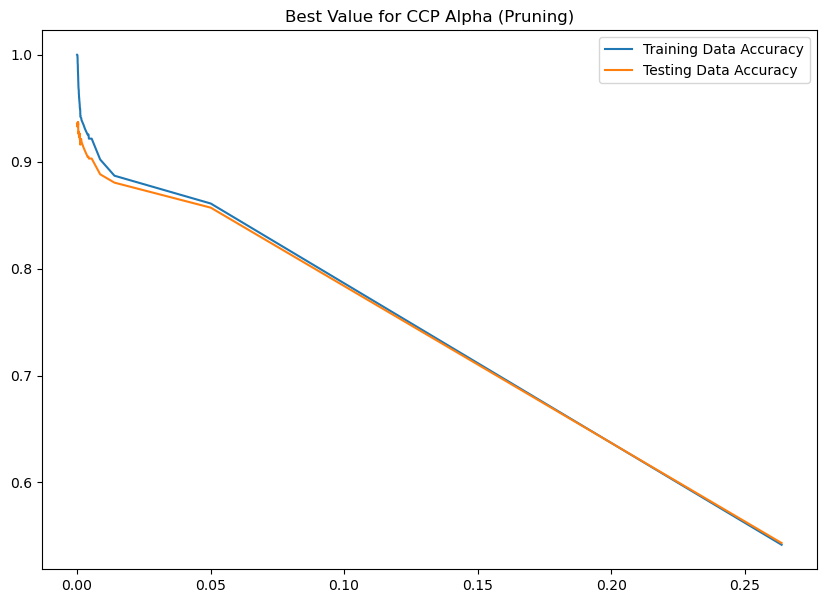

In [74]:
# Plot of Accuracies to take best value of ccp alpha from graph
fig,ax = plt.subplots()
ax.figure.set_size_inches(10,7)
ax.plot(ccp_list,train_acc_list,label="Training Data Accuracy")
ax.plot(ccp_list,test_acc_list,label="Testing Data Accuracy")
ax.legend()
plt.title("Best Value for CCP Alpha (Pruning)")
plt.show()

In [75]:
dt_clf_ccp_sm = DecisionTreeClassifier(random_state=10,ccp_alpha=cc_val)
dt_clf_ccp_sm.fit(xr_train,yr_train)

DecisionTreeClassifier(ccp_alpha=0.0002503912363067293, random_state=10)

In [76]:
# Evaluation of Descision Tree classifier Model based on Training data after sampling and Pruning -
y_pred = dt_clf_ccp_sm.predict(xr_train)

cnf_matrix = confusion_matrix(yr_train,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci = precision_score(yr_train,y_pred)
print(f"Precision - {preci}\n")
recal = recall_score(yr_train,y_pred)
print(f"Recall - {recal}\n")
accuracy = accuracy_score(yr_train,y_pred)
print(f"Accuracy - {accuracy}\n")
f1 = f1_score(yr_train,y_pred)
print(f"F1 Score - {f1}\n")

cnf_report = classification_report(yr_train,y_pred)
print(f"Classification report - \n{cnf_report}")

Confusion matrix - 
[[2092   23]
 [  17 2483]]

Precision - 0.9908220271348763

Recall - 0.9932

Accuracy - 0.991332611050921

F1 Score - 0.9920095884938074

Classification report - 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2115
           1       0.99      0.99      0.99      2500

    accuracy                           0.99      4615
   macro avg       0.99      0.99      0.99      4615
weighted avg       0.99      0.99      0.99      4615



In [77]:
# Evaluation of Descision Tree classifer Model based on Testing data after sampling and Pruning -
y_pred = dt_clf_ccp_sm.predict(xr_test)

cnf_matrix = confusion_matrix(yr_test,y_pred)
print(f"Confusion matrix - \n{cnf_matrix}\n")

preci2 = precision_score(yr_test,y_pred)
print(f"Precision - {preci2}\n")
recal2 = recall_score(yr_test,y_pred)
print(f"Recall - {recal2}\n")
accuracy2 = accuracy_score(yr_test,y_pred)
print(f"Accuracy - {accuracy2}\n")
f12 = f1_score(yr_test,y_pred)
print(f"F1 Score - {f12}\n")

cnf_report = classification_report(yr_test,y_pred)
print(f"Classification report - \n{cnf_report}")
res33 = pd.DataFrame([["Descision Tree Classifier",preci2,recal2,accuracy2,f12]],
                   columns=["Model","Precision","Recall","Accuracy","f1 Score"])

Confusion matrix - 
[[481  46]
 [ 27 600]]

Precision - 0.9287925696594427

Recall - 0.9569377990430622

Accuracy - 0.9367417677642981

F1 Score - 0.9426551453260016

Classification report - 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       527
           1       0.93      0.96      0.94       627

    accuracy                           0.94      1154
   macro avg       0.94      0.93      0.94      1154
weighted avg       0.94      0.94      0.94      1154



There is quite improvement of accuracy and f1score in the Descision Tree model now we compare predicting probability of classes prediction and then we can finalize the Best model.

### Probability Distribution

In [79]:
# Storing predicted probabilities for class 1 
y_pred_lr_prob = lr_model_sm.predict_proba(xr_test)[:,1]
y_pred_knn_prob = knn_model_sm.predict_proba(xr_test)[:,1]
y_pred_dt_prob = dt_clf_ccp_sm.predict_proba(xr_test)[:,1]

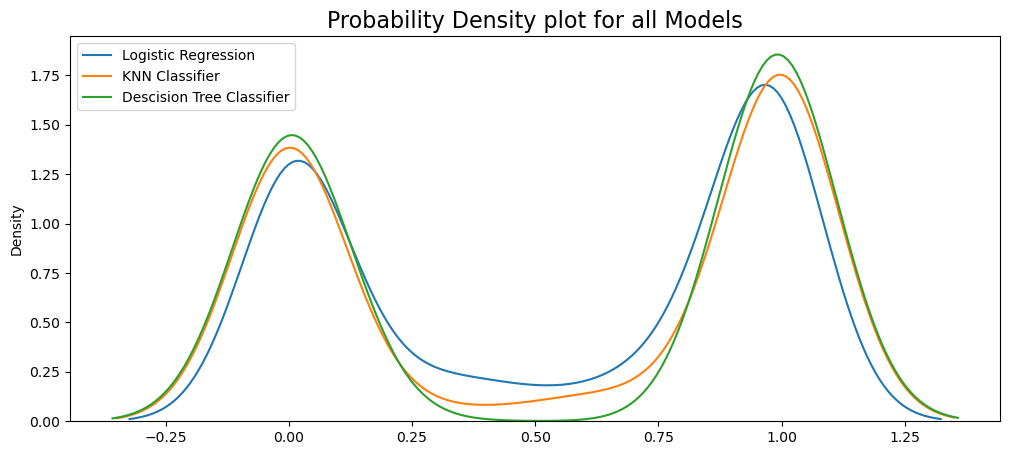

In [80]:
# Plotting kdeplot of Probability desnsity for all models
plt.figure(figsize=(12,5))
sns.kdeplot(y_pred_lr_prob,label="Logistic Regression")
sns.kdeplot(y_pred_knn_prob,label="KNN Classifier")
sns.kdeplot(y_pred_dt_prob,label="Descision Tree Classifier")
plt.title("Probability Density plot for all Models",fontsize=16)
plt.legend()
plt.show()

As observed, in general all the algorithms presents most probabilities concentrated around `1`. However, 
`DescisionTreeClassifier` presents the largest amount of probabilities concentrated around `1` and `0`, while 
`DescisionTreeClassifier` presenting the least with a moderate distributed probabilities around other values. 
The term `DescisionTreeClassifier` suits best for the context and challenge of our project.

Here, We have got the best values of accuracy, precision, recall and f1 score. Descision Tree model 
after pruning and avoiding overfitting.
Descision Tree Model Accuracies -
- Training -
  - Precision - 0.9908220271348763
  - Recall - 0.9932
  - Accuracy - 0.991332611050921
  - F1 Score - 0.9920095884938074
    
- Testing - 
  - Precision - 0.9287925696594427
  - Recall - 0.9569377990430622
  - Accuracy - 0.9367417677642981
  - F1 Score - 0.9426551453260016

### User Input Testing

In [82]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Tenure1',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [92]:
# Writting code to create dictionary of all encoded Features -
gender_val = {'Male': 1, 'Female': 0}
phone_service_val = {'Yes': 1, 'No': 0}
dependents_val = {'No': 0, 'Yes': 1}
partner_val = {'No': 0, 'Yes': 1}
multiple_lines_val = {'No': 0, 'Yes': 1, 'No phone service': 2}
online_security_val = {'No': 0, 'Yes': 1, 'No internet service': 2}
online_backup_val = {'No': 0, 'Yes': 1, 'No internet service': 2}
device_protection_val = {'No': 0, 'Yes': 1, 'No internet service': 2}
tech_support_val = {'No': 0, 'Yes': 1, 'No internet service': 2}
streaming_tv_val = {'No': 0, 'Yes': 1, 'No internet service': 2}
streaming_movies_val = {'No': 0, 'Yes': 1, 'No internet service': 2}
contract_val = {'Month-to-month': 0, 'Two year': 2, 'One year': 1}
paper_less_billing_val = {'Yes': 1, 'No': 0}
encoded = {"gender_val" : gender_val,
           "phone_service_val" : phone_service_val,
           "dependents_val" : dependents_val,
           "partner_val" : partner_val,
           "multiple_lines_val" : multiple_lines_val,
           "online_security_val" : online_security_val,
           "online_backup_val" : online_backup_val,
           "device_protection_val" : device_protection_val,
           "tech_support_val" : tech_support_val,
           "streaming_tv_val" : streaming_tv_val,
           "streaming_movies_val" :streaming_movies_val,
           "contract_val" : contract_val,
           "paper_less_billing_val" : paper_less_billing_val,
           "columns":list(x.columns)}
encoded

{'gender_val': {'Male': 1, 'Female': 0},
 'phone_service_val': {'Yes': 1, 'No': 0},
 'dependents_val': {'No': 0, 'Yes': 1},
 'partner_val': {'No': 0, 'Yes': 1},
 'multiple_lines_val': {'No': 0, 'Yes': 1, 'No phone service': 2},
 'online_security_val': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'online_backup_val': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'device_protection_val': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'tech_support_val': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'streaming_tv_val': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'streaming_movies_val': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'contract_val': {'Month-to-month': 0, 'Two year': 2, 'One year': 1},
 'paper_less_billing_val': {'Yes': 1, 'No': 0},
 'columns': ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contrac

In [93]:
# Creating json file of encoded so we can further use it.
with open("encoded.json","w") as f:
    json.dump(encoded,f)

In [105]:
# Opening original Df for the taking random entry for user input testing -
df_ut = pd.read_csv("Telco-Customer-Churn.csv").drop(["customerID"],axis=1)
df_ut.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
# Checking for the 3st entry in the data.
df_ut.iloc[2]

gender                        Male
SeniorCitizen                    0
Partner                         No
Dependents                      No
tenure                           2
PhoneService                   Yes
MultipleLines                   No
InternetService                DSL
OnlineSecurity                 Yes
OnlineBackup                   Yes
DeviceProtection                No
TechSupport                     No
StreamingTV                     No
StreamingMovies                 No
Contract            Month-to-month
PaperlessBilling               Yes
PaymentMethod         Mailed check
MonthlyCharges               53.85
TotalCharges                108.15
Churn                          Yes
Name: 2, dtype: object

In [114]:
# Creating variables and assigning known values for user input testing - 
gender            = "Male"
SeniorCitizen     = 0
Partner           = "No"
Dependents        = "No"
tenure            = 2
PhoneService      = "Yes"
MultipleLines     = "No"
InternetService   = "DSL"              #One-Hot-Encoded
OnlineSecurity    = "Yes"
OnlineBackup      = "Yes"
DeviceProtection  = "No"
TechSupport       = "No"
StreamingTV       = "No"
StreamingMovies   = "No"
Contract          = "Month-to-month"
PaperlessBilling  = "Yes"
PaymentMethod     = "Mailed check" #One-Hot-Encoded
MonthlyCharges    = 53.85
TotalCharges      = 108.15

In [115]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Tenure1',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [116]:
# Creating array of values so we can pass the values to the our model -
column_names = x.columns

gender_1 = gender_val[gender]
PhoneService_1 = phone_service_val[PhoneService]
Dependents_1 = dependents_val[Dependents]
Partner_1 = partner_val[Partner]
MultipleLines_1 = multiple_lines_val[MultipleLines]
OnlineSecurity_1 = online_security_val[OnlineSecurity]
OnlineBackup_1 = online_backup_val[OnlineBackup]
DeviceProtection_1 = device_protection_val[DeviceProtection]
TechSupport_1 = tech_support_val[TechSupport]
StreamingTV_1 = streaming_tv_val[StreamingTV]
StreamingMovies_1 = streaming_movies_val[StreamingMovies]
Contract_1 = contract_val[Contract]
PaperlessBilling_1 = paper_less_billing_val[PaperlessBilling]

# If-Elif-Else block to encode tenure Feature.
if tenure > 0 and tenure <= 12:
    Tenure1 = 1
elif tenure > 12 and tenure <= 24:
    Tenure1 = 2
elif tenure > 24 and tenure <= 36:
    Tenure1 = 3
elif tenure > 36 and tenure <= 48:
    Tenure1 = 4
elif tenure > 48 and tenure <= 60:
    Tenure1 = 5
else:
    Tenure1 = 6
    
array = np.zeros(len(x.columns),dtype=float)
array[0]  = gender_1
array[1]  = SeniorCitizen
array[2]  = Partner_1
array[3]  = Dependents_1
array[4]  = PhoneService_1
array[5]  = MultipleLines_1
array[6]  = OnlineSecurity_1
array[7]  = OnlineBackup_1
array[8]  = DeviceProtection_1
array[9]  = TechSupport_1
array[10] = StreamingTV_1
array[11] = StreamingMovies_1
array[12] = Contract_1
array[13] = PaperlessBilling_1
array[14] = MonthlyCharges
array[15] = TotalCharges
array[16] = Tenure1

InternetService_1 = "InternetService_" + InternetService
InternetService_index = np.where(column_names == InternetService_1)[0][0]
array[InternetService_index] = 1

PaymentMethod_1 = "PaymentMethod_" + PaymentMethod
PaymentMethod_index = np.where(column_names == PaymentMethod_1)[0][0]
array[PaymentMethod_index] = 1

In [118]:
# predicting values based on user input from the best model.
print(array)
Predict_Customer_Churn = np.around(dt_clf_ccp_sm.predict([array])[0])
print("\nPredicted Customer Churn - ",Predict_Customer_Churn)
if Predict_Customer_Churn == 0:
    print("\nPredicted Customer will not Churn.")
else:
    print("\nPredicted Customer will Churn.")

[  1.     0.     0.     0.     1.     0.     1.     1.     0.     0.
   0.     0.     0.     1.    53.85 108.15   1.     1.     0.     0.
   0.     0.     0.     1.  ]

Predicted Customer Churn -  1

Predicted Customer will Churn.


In [119]:
# Creating pickle file for Descision Tree model after pruning and sampling -
with open("dt_model.pkl","wb") as f1:
    pickle.dump(dt_clf_ccp_sm,f1)

In [5]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df1 = df.set_index("customerID").drop("Churn",axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [27]:
lst = df1.loc["7590-VHVEG"].tolist()
lst

['Female',
 0,
 'Yes',
 'No',
 1,
 'No',
 'No phone service',
 'DSL',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Month-to-month',
 'Yes',
 'Electronic check',
 29.85,
 '29.85']

In [44]:
gender = lst[0]
SeniorCitizen = int(lst[1])
Partner = lst[2]
Dependents = lst[3]
tenure = int(lst[4])
PhoneService = lst[5]
MultipleLines = lst[6]
InternetService = lst[7]    
OnlineSecurity = lst[8]
OnlineBackup = lst[9]
DeviceProtection = lst[10]
TechSupport = lst[11]
StreamingTV = lst[12]
StreamingMovies = lst[13]
Contract = lst[14]
PaperlessBilling = lst[15]
PaymentMethod = lst[16]
MonthlyCharges = float(lst[17])
TotalCharges = eval(lst[18])